In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sqlite3
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the necessary dataset
#loading the tmdb movies csv file
tmdb=pd.read_csv("Datasets/tmdb.movies.csv")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [3]:
#creating a copy
tmdb1 = tmdb.copy(deep=True)
tmdb1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
#dropping unncessary columns
tmdb1.drop(["vote_average","vote_count","genre_ids","id"], axis=1,inplace=True)

In [5]:
tmdb1

,Unnamed: 0,original_language,original_title,popularity,release_date,title
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,3,en,Toy Story,28.005,1995-11-22,Toy Story
4,4,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,26514,en,The Last One,0.600,2018-10-01,The Last One
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made


In [6]:
#renaming the unnamed column'
tmdb1.rename(columns={"Unnamed":"id"},inplace=True)

In [7]:
tmdb1

,Unnamed: 0,original_language,original_title,popularity,release_date,title
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,3,en,Toy Story,28.005,1995-11-22,Toy Story
4,4,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,26514,en,The Last One,0.600,2018-10-01,The Last One
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made


In [8]:
tmdb1.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [9]:
tmdb1

,id,original_language,original_title,popularity,release_date,title
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,3,en,Toy Story,28.005,1995-11-22,Toy Story
4,4,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,26514,en,The Last One,0.600,2018-10-01,The Last One
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made


In [10]:
tmdb1["popularity"]=tmdb1["popularity"].round(1)

In [11]:
tmdb1

,id,original_language,original_title,popularity,release_date,title
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.5,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,1,en,How to Train Your Dragon,28.7,2010-03-26,How to Train Your Dragon
2,2,en,Iron Man 2,28.5,2010-05-07,Iron Man 2
3,3,en,Toy Story,28.0,1995-11-22,Toy Story
4,4,en,Inception,27.9,2010-07-16,Inception
...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions
26513,26513,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_
26514,26514,en,The Last One,0.6,2018-10-01,The Last One
26515,26515,en,Trailer Made,0.6,2018-06-22,Trailer Made


In [12]:
tmdb1["release_date"]= pd.to_datetime(tmdb1["release_date"]).dt.year

In [13]:
tmdb1

,id,original_language,original_title,popularity,release_date,title
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.5,2010,Harry Potter and the Deathly Hallows: Part 1
1,1,en,How to Train Your Dragon,28.7,2010,How to Train Your Dragon
2,2,en,Iron Man 2,28.5,2010,Iron Man 2
3,3,en,Toy Story,28.0,1995,Toy Story
4,4,en,Inception,27.9,2010,Inception
...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.6,2018,Laboratory Conditions
26513,26513,en,_EXHIBIT_84xxx_,0.6,2018,_EXHIBIT_84xxx_
26514,26514,en,The Last One,0.6,2018,The Last One
26515,26515,en,Trailer Made,0.6,2018,Trailer Made


In [14]:
#checking for missing values 
tmdb1.isna().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
dtype: int64

In [15]:
#checking for duplicated values
tmdb1.duplicated().sum()

0

In [16]:
bom=pd.read_csv("Datasets/bom.movie_gross.csv")

In [17]:
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
bom1 = bom.copy(deep=True)
bom1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
bom1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

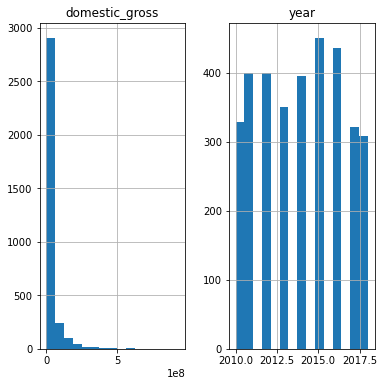

In [20]:
bom1.hist(bins=15,figsize=(6,6));

In [21]:
bom1["domestic_gross"]=bom1["domestic_gross"].fillna(bom1["domestic_gross"].median())

In [22]:
# Step 1: Remove commas from the 'foreign_gross' column
bom1['foreign_gross'] = bom1['foreign_gross'].replace({',': ''}, regex=True)

# Step 2: Convert the column to numeric values, using 'coerce' to handle errors
bom1['foreign_gross'] = pd.to_numeric(bom1['foreign_gross'], errors='coerce')

# Step 3: Replace NaN values with the median of the column
median_value = bom1['foreign_gross'].median()
bom1['foreign_gross'] = bom1['foreign_gross'].fillna(median_value)

In [23]:
bom1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18700000.0,2018
3384,El Pacto,Sony,2500.0,18700000.0,2018
3385,The Swan,Synergetic,2400.0,18700000.0,2018


In [24]:
#dropping unnecessary columns
bom1.drop(['studio'],axis=1,inplace=True)

In [25]:
bom1.isnull().sum().any()

False

In [26]:
bom1

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010
...,...,...,...,...
3382,The Quake,6200.0,18700000.0,2018
3383,Edward II (2018 re-release),4800.0,18700000.0,2018
3384,El Pacto,2500.0,18700000.0,2018
3385,The Swan,2400.0,18700000.0,2018


In [27]:
#adding a new column
bom1["total_gross"]=bom1["domestic_gross"]+bom1["foreign_gross"]
bom1

,title,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
3382,The Quake,6200.0,18700000.0,2018,1.870620e+07
3383,Edward II (2018 re-release),4800.0,18700000.0,2018,1.870480e+07
3384,El Pacto,2500.0,18700000.0,2018,1.870250e+07
3385,The Swan,2400.0,18700000.0,2018,1.870240e+07


In [28]:
#changing to currency for uniformity 
bom1['domestic_gross'] = bom1['domestic_gross'].apply(lambda x: f"${x:,.2f}")

In [29]:
bom1['foreign_gross'] = bom1['foreign_gross'].apply(lambda x: f"${x:,.2f}")

In [30]:
bom1['total_gross'] = bom1['total_gross'].apply(lambda x: f"${x:,.2f}")

In [31]:
bom1

,title,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,"$415,000,000.00","$652,000,000.00",2010,"$1,067,000,000.00"
1,Alice in Wonderland (2010),"$334,200,000.00","$691,300,000.00",2010,"$1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,"$296,000,000.00","$664,300,000.00",2010,"$960,300,000.00"
3,Inception,"$292,600,000.00","$535,700,000.00",2010,"$828,300,000.00"
4,Shrek Forever After,"$238,700,000.00","$513,900,000.00",2010,"$752,600,000.00"
...,...,...,...,...,...
3382,The Quake,"$6,200.00","$18,700,000.00",2018,"$18,706,200.00"
3383,Edward II (2018 re-release),"$4,800.00","$18,700,000.00",2018,"$18,704,800.00"
3384,El Pacto,"$2,500.00","$18,700,000.00",2018,"$18,702,500.00"
3385,The Swan,"$2,400.00","$18,700,000.00",2018,"$18,702,400.00"


In [32]:
#confirming the changes
bom1

,title,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,"$415,000,000.00","$652,000,000.00",2010,"$1,067,000,000.00"
1,Alice in Wonderland (2010),"$334,200,000.00","$691,300,000.00",2010,"$1,025,500,000.00"
2,Harry Potter and the Deathly Hallows Part 1,"$296,000,000.00","$664,300,000.00",2010,"$960,300,000.00"
3,Inception,"$292,600,000.00","$535,700,000.00",2010,"$828,300,000.00"
4,Shrek Forever After,"$238,700,000.00","$513,900,000.00",2010,"$752,600,000.00"
...,...,...,...,...,...
3382,The Quake,"$6,200.00","$18,700,000.00",2018,"$18,706,200.00"
3383,Edward II (2018 re-release),"$4,800.00","$18,700,000.00",2018,"$18,704,800.00"
3384,El Pacto,"$2,500.00","$18,700,000.00",2018,"$18,702,500.00"
3385,The Swan,"$2,400.00","$18,700,000.00",2018,"$18,702,400.00"


In [33]:
#adding the id as the  first column
bom1.insert(0, 'id', range(1, len(bom1) + 1))


In [34]:
bom1

,id,title,domestic_gross,foreign_gross,year,total_gross
0,1,Toy Story 3,"$415,000,000.00","$652,000,000.00",2010,"$1,067,000,000.00"
1,2,Alice in Wonderland (2010),"$334,200,000.00","$691,300,000.00",2010,"$1,025,500,000.00"
2,3,Harry Potter and the Deathly Hallows Part 1,"$296,000,000.00","$664,300,000.00",2010,"$960,300,000.00"
3,4,Inception,"$292,600,000.00","$535,700,000.00",2010,"$828,300,000.00"
4,5,Shrek Forever After,"$238,700,000.00","$513,900,000.00",2010,"$752,600,000.00"
...,...,...,...,...,...,...
3382,3383,The Quake,"$6,200.00","$18,700,000.00",2018,"$18,706,200.00"
3383,3384,Edward II (2018 re-release),"$4,800.00","$18,700,000.00",2018,"$18,704,800.00"
3384,3385,El Pacto,"$2,500.00","$18,700,000.00",2018,"$18,702,500.00"
3385,3386,The Swan,"$2,400.00","$18,700,000.00",2018,"$18,702,400.00"


In [35]:
#loading the sql database
mvsql=sqlite3.connect("Datasets/im.db")

In [36]:
#viewing the tables
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", mvsql)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [37]:
#loading the movie basics table from the sql database
mvbas=pd.read_sql("""SELECT * FROM movie_basics;""",mvsql)

In [38]:
mvbas

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [39]:
#creating a new copy
mvbas1 = mvbas.copy(deep=True)
mvbas1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [40]:
#dropping unnecesary columns
mvbas1.drop(["original_title","runtime_minutes"],axis=1,inplace=True)

In [41]:
mvbas1

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,None


In [42]:
#renaming columns for uniformity
mvbas1.rename(columns={"movie_id":'id'},inplace=True)

In [43]:
mvbas1.rename(columns={"start_year":'year'},inplace=True)

In [44]:
mvbas1.rename(columns={"primary_title":'title'},inplace=True)

In [45]:
mvbas1

,id,title,year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,None


In [46]:
#loading the movie rating table
mvrat=pd.read_sql("""SELECT * FROM movie_ratings;""",mvsql)

In [47]:
#creating a new copy
mvrat1= mvrat.copy(deep=True)

In [48]:
mvrat1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [49]:
#dropping unnecessary columns
mvrat1.drop(["numvotes"],axis=1,inplace=True)

In [50]:
#renaming columns
mvrat1.rename(columns={"movie_id":"id"},inplace=True)

In [51]:
mvrat1.rename(columns={"averagerating":"average_rating"},inplace=True)

In [52]:
mvrat1

,id,average_rating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


In [53]:
# Merge tables from the sql which are relatabe specifying same column names (id)
merged_movies = pd.merge(mvbas1, mvrat1, left_on='id', right_on='id', how='inner')


print(merged_movies)

              id                            title  year                genres  \
0      tt0063540                        Sunghursh  2013    Action,Crime,Drama   
1      tt0066787  One Day Before the Rainy Season  2019       Biography,Drama   
2      tt0069049       The Other Side of the Wind  2018                 Drama   
3      tt0069204                  Sabse Bada Sukh  2018          Comedy,Drama   
4      tt0100275         The Wandering Soap Opera  2017  Comedy,Drama,Fantasy   
...          ...                              ...   ...                   ...   
73851  tt9913084                 Diabolik sono io  2019           Documentary   
73852  tt9914286                Sokagin Çocuklari  2019          Drama,Family   
73853  tt9914642                        Albatross  2017           Documentary   
73854  tt9914942       La vida sense la Sara Amat  2019                  None   
73855  tt9916160                       Drømmeland  2019           Documentary   

       average_rating  
0  

In [54]:
#changing into a dataframe
merged_movies_df=pd.DataFrame(merged_movies)
merged_movies_df

,id,title,year,genres,average_rating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
73853,tt9914642,Albatross,2017,Documentary,8.5
73854,tt9914942,La vida sense la Sara Amat,2019,None,6.6


In [55]:
#Merging the tm1 dataset("tmdb.movies.csv") to the original merged data set
# First merge: Add tmdb1 to the existing merged DataFrame
merged_movies_final = pd.merge(merged_movies, tmdb1, on="title", how='inner')

# Second merge: Add bom1 to the updated merged DataFrame using the same column name
merged_movies_final = pd.merge(merged_movies, bom1, on='title', how='inner')

# Check the result
print(merged_movies_final.head())


        id_x                            title  year_x  \
0  tt0315642                            Wazir    2016   
1  tt0337692                      On the Road    2012   
2  tt4339118                      On the Road    2014   
3  tt5647250                      On the Road    2016   
4  tt0359950  The Secret Life of Walter Mitty    2013   

                    genres  average_rating  id_y  domestic_gross  \
0       Action,Crime,Drama             7.1  2569   $1,100,000.00   
1  Adventure,Drama,Romance             6.1   905     $744,000.00   
2                    Drama             6.0   905     $744,000.00   
3                    Drama             5.7   905     $744,000.00   
4   Adventure,Comedy,Drama             7.3  1170  $58,200,000.00   

     foreign_gross  year_y      total_gross  
0   $18,700,000.00    2016   $19,800,000.00  
1    $8,000,000.00    2012    $8,744,000.00  
2    $8,000,000.00    2012    $8,744,000.00  
3    $8,000,000.00    2012    $8,744,000.00  
4  $129,900,000.00

In [56]:
#loading the dataframe
merged_movies_final_df=pd.DataFrame(merged_movies_final)
merged_movies_final_df

,id_x,title,year_x,genres,average_rating,id_y,domestic_gross,foreign_gross,year_y,total_gross
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,2569,"$1,100,000.00","$18,700,000.00",2016,"$19,800,000.00"
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,tt4339118,On the Road,2014,Drama,6.0,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,tt5647250,On the Road,2016,Drama,5.7,905,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,1170,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"
...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,2018,Drama,7.1,2322,$300.00,"$18,700,000.00",2015,"$18,700,300.00"
3023,tt8404272,How Long Will I Love U,2018,Romance,6.5,3150,"$747,000.00","$82,100,000.00",2018,"$82,847,000.00"
3024,tt8427036,Helicopter Eela,2018,Drama,5.4,3355,"$72,000.00","$18,700,000.00",2018,"$18,772,000.00"
3025,tt9078374,Last Letter,2018,"Drama,Romance",6.4,3320,"$181,000.00","$18,700,000.00",2018,"$18,881,000.00"


In [57]:
#dropping unecessary/repeated columns for the merged datasets
merged_movies_final_df.drop(columns=["id_x","year_x","id_y"],axis=1,inplace=True)

In [58]:
merged_movies_final_df

,title,genres,average_rating,domestic_gross,foreign_gross,year_y,total_gross
0,Wazir,"Action,Crime,Drama",7.1,"$1,100,000.00","$18,700,000.00",2016,"$19,800,000.00"
1,On the Road,"Adventure,Drama,Romance",6.1,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,On the Road,Drama,6.0,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,On the Road,Drama,5.7,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"
...,...,...,...,...,...,...,...
3022,The Chambermaid,Drama,7.1,$300.00,"$18,700,000.00",2015,"$18,700,300.00"
3023,How Long Will I Love U,Romance,6.5,"$747,000.00","$82,100,000.00",2018,"$82,847,000.00"
3024,Helicopter Eela,Drama,5.4,"$72,000.00","$18,700,000.00",2018,"$18,772,000.00"
3025,Last Letter,"Drama,Romance",6.4,"$181,000.00","$18,700,000.00",2018,"$18,881,000.00"


In [59]:
#checking for missing values
merged_movies_final_df.isna().sum()

title             0
genres            7
average_rating    0
domestic_gross    0
foreign_gross     0
year_y            0
total_gross       0
dtype: int64

In [60]:
#filling the missing values
for column in merged_movies_final_df.select_dtypes(include=["object"]).columns:
    merged_movies_final_df[column].fillna(merged_movies_final_df[column].mode()[0],inplace=True)

In [61]:
#confirming changes
merged_movies_final_df.isna().sum()

title             0
genres            0
average_rating    0
domestic_gross    0
foreign_gross     0
year_y            0
total_gross       0
dtype: int64

In [62]:
#renaming columns
merged_movies_final_df.rename({"year_y":"year"},axis=1,inplace=True)

In [63]:
merged_movies_final_df

,title,genres,average_rating,domestic_gross,foreign_gross,year,total_gross
0,Wazir,"Action,Crime,Drama",7.1,"$1,100,000.00","$18,700,000.00",2016,"$19,800,000.00"
1,On the Road,"Adventure,Drama,Romance",6.1,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,On the Road,Drama,6.0,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,On the Road,Drama,5.7,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"
...,...,...,...,...,...,...,...
3022,The Chambermaid,Drama,7.1,$300.00,"$18,700,000.00",2015,"$18,700,300.00"
3023,How Long Will I Love U,Romance,6.5,"$747,000.00","$82,100,000.00",2018,"$82,847,000.00"
3024,Helicopter Eela,Drama,5.4,"$72,000.00","$18,700,000.00",2018,"$18,772,000.00"
3025,Last Letter,"Drama,Romance",6.4,"$181,000.00","$18,700,000.00",2018,"$18,881,000.00"


In [64]:
#checking for outliers
#sns.boxplot(merged_movies_final_df)

In [65]:
#checking if all the necessary data is available
merged_movies_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3027 non-null   object 
 1   genres          3027 non-null   object 
 2   average_rating  3027 non-null   float64
 3   domestic_gross  3027 non-null   object 
 4   foreign_gross   3027 non-null   object 
 5   year            3027 non-null   int64  
 6   total_gross     3027 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 189.2+ KB


In [66]:
#loading the second dataset
rt = pd.read_csv("Datasets/rt.movie_info.tsv",delimiter="\t")
rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [67]:
#creating a copy
rt1 =rt.copy(deep=True)
rt1

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [68]:
#dropping unecessary columns
rt1.drop(["synopsis","writer","dvd_date","currency","runtime"],axis=1,inplace=True)

In [69]:
rt1

,id,rating,genre,director,theater_date,box_office,studio
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,"Oct 9, 1971",NaN,NaN
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","600,000",Entertainment One
2,5,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996",NaN,NaN
3,6,R,Drama|Mystery and Suspense,Barry Levinson,"Dec 9, 1994",NaN,NaN
4,7,NR,Drama|Romance,Rodney Bennett,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,"Aug 18, 2006","33,886,034",New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,"Jul 23, 1993",NaN,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,"Jan 1, 1962",NaN,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,"Apr 1, 1993",NaN,NaN


In [70]:
#checking for missing values
rt1.isna().sum()

id                 0
rating             3
genre              8
director         199
theater_date     359
box_office      1220
studio          1066
dtype: int64

In [71]:
#filling missing values for objects using mode
for column in rt1.select_dtypes(include=["object"]).columns:
    rt1[column].fillna(rt1[column].mode()[0],inplace=True)

In [72]:
#changing the box office values to numerical(box office sales a movie makes after its release)
#noted it was not numerical since it gave out an error when trying to fill missing values
# Step 1: Remove commas
rt1['box_office'] = rt1['box_office'].str.replace(',', '')

# Step 2: Convert to integers
rt1['box_office'] = rt1['box_office'].astype(int)



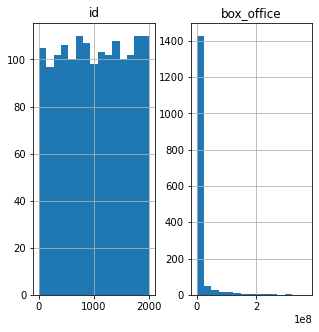

In [73]:
#checking for uniformity using a histogram
rt1.hist(bins=15,figsize=(5,5));

In [74]:
#filling in the missing values
rt1["box_office"]=rt1["box_office"].fillna(rt1["box_office"].median())

In [75]:
#confirming no missing values
rt1.isnull().sum().any()

False

In [76]:
rt1

,id,rating,genre,director,theater_date,box_office,studio
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,"Oct 9, 1971",20900803,Universal Pictures
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012",600000,Entertainment One
2,5,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996",20900803,Universal Pictures
3,6,R,Drama|Mystery and Suspense,Barry Levinson,"Dec 9, 1994",20900803,Universal Pictures
4,7,NR,Drama|Romance,Rodney Bennett,"Jan 1, 1987",20900803,Universal Pictures
...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,Steven Spielberg,"Aug 18, 2006",33886034,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,"Jul 23, 1993",20900803,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,"Jan 1, 1962",20900803,Universal Pictures
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,"Apr 1, 1993",20900803,Universal Pictures


In [77]:
#converting the date time to year only for easier analysis
rt1["theater_date"]= pd.to_datetime(rt1["theater_date"]).dt.year

In [78]:
# Split 'genre' into 'main_genre' and 'supporting_genre', handling NaN values
rt1['main_genre'] = rt1['genre'].str.split('|').str[0]
rt1['supporting_genre'] = rt1['genre'].str.split('|').apply(
    lambda x: '|'.join(x[1:]) if isinstance(x, list) and len(x) > 1 else ''
)


# Preview the result
rt1[['genre', 'main_genre', 'supporting_genre']].head()



,genre,main_genre,supporting_genre
0,Action and Adventure|Classics|Drama,Action and Adventure,Classics|Drama
1,Drama|Science Fiction and Fantasy,Drama,Science Fiction and Fantasy
2,Drama|Musical and Performing Arts,Drama,Musical and Performing Arts
3,Drama|Mystery and Suspense,Drama,Mystery and Suspense
4,Drama|Romance,Drama,Romance


In [79]:
rt1

,id,rating,genre,director,theater_date,box_office,studio,main_genre,supporting_genre
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,1971,20900803,Universal Pictures,Action and Adventure,Classics|Drama
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,2012,600000,Entertainment One,Drama,Science Fiction and Fantasy
2,5,R,Drama|Musical and Performing Arts,Allison Anders,1996,20900803,Universal Pictures,Drama,Musical and Performing Arts
3,6,R,Drama|Mystery and Suspense,Barry Levinson,1994,20900803,Universal Pictures,Drama,Mystery and Suspense
4,7,NR,Drama|Romance,Rodney Bennett,1987,20900803,Universal Pictures,Drama,Romance
...,...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,Steven Spielberg,2006,33886034,New Line Cinema,Action and Adventure,Horror|Mystery and Suspense
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,1993,20900803,Paramount Vantage,Comedy,Science Fiction and Fantasy
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,1962,20900803,Universal Pictures,Classics,Comedy|Drama|Musical and Performing Arts
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,1993,20900803,Universal Pictures,Comedy,Drama|Kids and Family|Sports and Fitness


In [80]:
#dropping the unnecessary new column created
rt1.drop(["genre","supporting_genre"],axis=1,inplace=True)

In [81]:
rt1.rename({"main_genre":"genre"},axis=1,inplace=True)

In [82]:
rt1

,id,rating,director,theater_date,box_office,studio,genre
0,1,R,William Friedkin,1971,20900803,Universal Pictures,Action and Adventure
1,3,R,David Cronenberg,2012,600000,Entertainment One,Drama
2,5,R,Allison Anders,1996,20900803,Universal Pictures,Drama
3,6,R,Barry Levinson,1994,20900803,Universal Pictures,Drama
4,7,NR,Rodney Bennett,1987,20900803,Universal Pictures,Drama
...,...,...,...,...,...,...,...
1555,1996,R,Steven Spielberg,2006,33886034,New Line Cinema,Action and Adventure
1556,1997,PG,Steve Barron,1993,20900803,Paramount Vantage,Comedy
1557,1998,G,Gordon Douglas,1962,20900803,Universal Pictures,Classics
1558,1999,PG,David Mickey Evans,1993,20900803,Universal Pictures,Comedy


In [83]:
merged_movies_final_df.to_csv("Datasets/merged movies.csv")

In [84]:
rt1.to_csv("Datasets/movie ratings.csv")

In [85]:
merged_movies_final_df.head()

,title,genres,average_rating,domestic_gross,foreign_gross,year,total_gross
0,Wazir,"Action,Crime,Drama",7.1,"$1,100,000.00","$18,700,000.00",2016,"$19,800,000.00"
1,On the Road,"Adventure,Drama,Romance",6.1,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
2,On the Road,Drama,6.0,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
3,On the Road,Drama,5.7,"$744,000.00","$8,000,000.00",2012,"$8,744,000.00"
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"$58,200,000.00","$129,900,000.00",2013,"$188,100,000.00"


In [86]:
rt1.head()

,id,rating,director,theater_date,box_office,studio,genre
0,1,R,William Friedkin,1971,20900803,Universal Pictures,Action and Adventure
1,3,R,David Cronenberg,2012,600000,Entertainment One,Drama
2,5,R,Allison Anders,1996,20900803,Universal Pictures,Drama
3,6,R,Barry Levinson,1994,20900803,Universal Pictures,Drama
4,7,NR,Rodney Bennett,1987,20900803,Universal Pictures,Drama


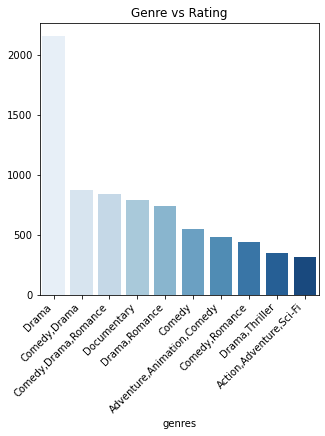

In [87]:


# Genre vs Rating 
genre_rating= merged_movies_final_df.groupby("genres")["average_rating"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 5))
sns.barplot(x=genre_rating.index, y=genre_rating.values,palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Rating')
plt.show()


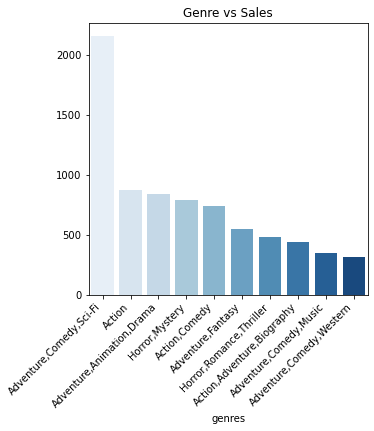

In [88]:
#Genre vs Sales
genre_sales= merged_movies_final_df.groupby("genres")["total_gross"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 5))
sns.barplot(x=genre_sales.index, y=genre_rating.values,palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.title('Genre vs Sales')
plt.show()

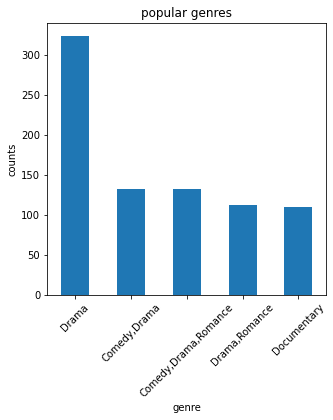

In [89]:
#popular genres based on their count
merged_movies_final_df["genres"].value_counts().head(5).plot(kind='bar',figsize=(5,5))
sns.set_palette('Blues')
plt.title("popular genres")
plt.ylabel("counts")
plt.xlabel('genre')
plt.xticks(rotation=45);

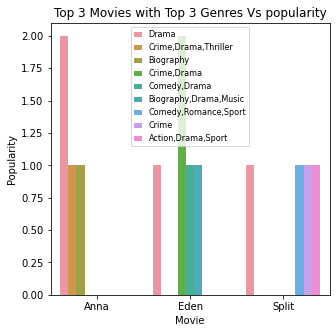

In [90]:
#top movies based on genre popularity
top_three_movies = merged_movies_final_df["title"].value_counts().head(3).index

filtered_data = merged_movies_final_df[merged_movies_final_df["title"].isin(top_three_movies)]

top_genres=(
    filtered_data.groupby("title")["genres"]
    .value_counts()
    .groupby(level=0).nlargest(3)
    .reset_index(level=0,drop=True)
    .index.get_level_values(1)
)
    
filtered_data=filtered_data[filtered_data['genres'].isin(top_genres)]

plt.figure(figsize=(5, 5))#select figure size
sns.countplot(data=filtered_data, x='title', hue='genres')#selecting type of graph(countplot)
plt.title('Top 3 Movies with Top 3 Genres Vs popularity')#title for the graph
plt.xlabel('Movie')#x-axis label
plt.ylabel('Popularity')#y-axis label
plt.legend(title='Genres')#legend title
plt.legend(fontsize='small')  # You can use 'small', 'medium', 'large' or specify a number like 8 or 10

# Alternatively, you can control the size of the legend box:
plt.legend(handlelength=1, fontsize=8)  #
plt.show()#visualize the graph



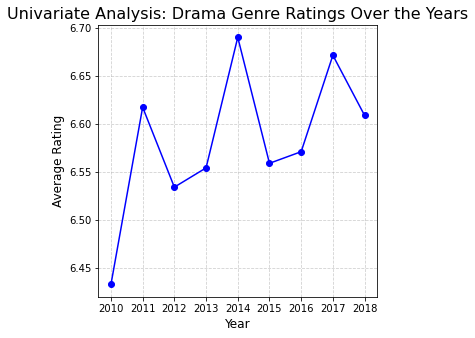

In [91]:
#how genre with best rating has faired over the years(univariate analysis)
# Filter for the genre of interest
genre_of_interest = "Drama"
drama_df = merged_movies_final_df[merged_movies_final_df['genres'].str.contains(genre_of_interest, na=False)]

# Perform univariate analysis: Focus on average ratings over time
drama_yearly = drama_df.groupby('year')['average_rating'].mean()

# Plotting the univariate trend
plt.figure(figsize=(5, 5))
drama_yearly.plot(kind='line', marker='o', color='blue')
plt.title(f"Univariate Analysis: Drama Genre Ratings Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show();

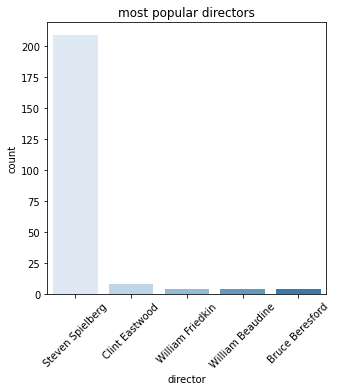

In [92]:
#popular directors
director_popularity = rt1['director'].value_counts().head(5)
plt.figure(figsize=(5,5))
sns.barplot(x=director_popularity.index,y=director_popularity.values)
plt.title("most popular directors")
plt.xlabel("director")
plt.ylabel("count")
plt.xticks(rotation=45);

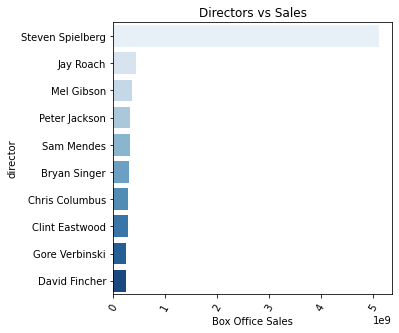

In [93]:
#best selling directors

# Group by director and sum the box office sales
director_sales = rt1.groupby("director")["box_office"].sum().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(5, 5))
sns.barplot(x=director_sales.values, y=director_sales.index, palette="Blues", orient="h")  # Horizontal bars

# Add title and labels
plt.xlabel('Box Office Sales')
plt.title('Directors vs Sales')

# Include x-tick labels (rotate for readability)
plt.xticks(rotation=60)

# Show the plot
plt.show()

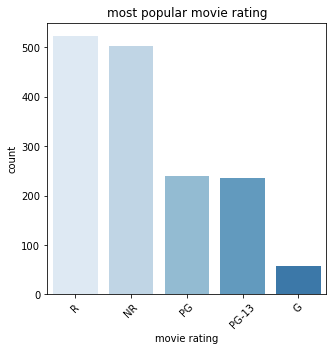

In [94]:
#popular movie rating
rating_popularity = rt1['rating'].value_counts().head(5)
plt.figure(figsize=(5,5))
sns.barplot(x=rating_popularity.index,y=rating_popularity.values)
plt.title("most popular movie rating")
plt.xlabel("movie rating")
plt.ylabel("count")
plt.xticks(rotation=45);

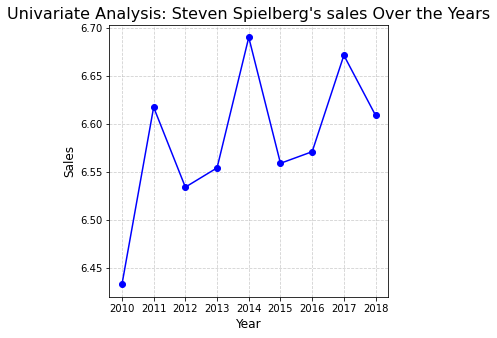

In [95]:
#univariate analysis based on the highest selling director
# Filter for the genre of interest
highest_director = "Steven Spielberg"
director_df = rt1[rt1['director'].str.contains(highest_director, na=False)]

# Perform univariate analysis: Focus on average ratings over time
performance_yearly = director_df.groupby('theater_date')['box_office'].mean()

# Plotting the univariate trend
plt.figure(figsize=(5, 5))
drama_yearly.plot(kind='line', marker='o', color='blue')
plt.title(f"Univariate Analysis: Steven Spielberg's sales Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()